### Setup

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

random_seed = 42

### Load MNIST

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X_raw = mnist['data']
y_raw = mnist['target']
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, random_state=random_seed, test_size=10000)

### Train Random Forest with Full Features

In [3]:
rf_cls = RandomForestClassifier(random_state=random_seed)
t0 = time.time()
rf_cls.fit(X_train, y_train)
t1 = time.time()
print('Training time with full features: ', t1 - t0);

y_test_pred = rf_cls.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_test_pred))

Training time with full features:  5.206990718841553
Accuracy score:  0.9482


### Train Random Forest with Reduced Dimensions

In [4]:
pca = PCA(n_components=0.95)
X_raw_reduced = pca.fit_transform(X_raw)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_raw_reduced, y_raw, random_state=random_seed, test_size=10000)

rf_cls = RandomForestClassifier(random_state=random_seed)
t0 = time.time()
rf_cls.fit(X_train_reduced, y_train_reduced)
t1 = time.time()
print('Training time with reduced features: ', t1 - t0);

y_test_pred = rf_cls.predict(X_test_reduced)
print('Accuracy score: ', accuracy_score(y_test_reduced, y_test_pred))

Training time with reduced features:  10.186981678009033
Accuracy score:  0.8904


### TSNE

In [5]:
sample_size = 1000
idx = np.random.permutation(len(X_raw))[:sample_size]

X_sample = X_raw[idx]
y_sample = y_raw[idx]

tsne = TSNE()
X_sample_reduced = tsne.fit_transform(X_sample)

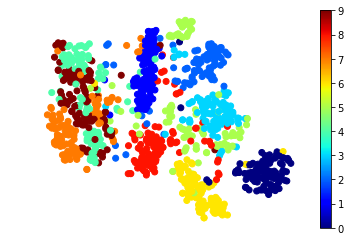

In [6]:
plt.scatter(X_sample_reduced[:, 0], X_sample_reduced[:, 1], c=y_sample, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()